In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

file_path = '/content/data.csv'
df = pd.read_csv(file_path)

In [136]:
df['Total Cognitive Complexity'] = pd.to_numeric(df['Total Cognitive Complexity'], errors='coerce')

# Filter rows where the value in the specified column is not a number
non_numeric_rows = df[df['Total Cognitive Complexity'].isna()]

In [137]:
non_numeric_rows

,File,NCSS,Total Cognitive Complexity,Cyclomatic Complexity,Overloads
18228,/fineract-core/src/main/java/org/apache/finera...,40,NaN,10,0
29268,/tools/validator/src/main/java/org/apache/cxf/...,125,NaN,36,0
29272,/tools/validator/src/main/java/org/apache/cxf/...,21,NaN,2,0
30492,/gremlin-groovy/src/main/java/org/apache/tinke...,13,NaN,4,0
30663,/streampark-flink/streampark-flink-connector/s...,91,NaN,1,0
...,...,...,...,...,...
541817,/worldedit-core/src/main/java/com/sk89q/worlde...,15,NaN,2,0
549301,/src/java/voldemort/serialization/json/JsonWri...,52,NaN,11,0
549305,/src/java/voldemort/serialization/ObjectSerial...,11,NaN,3,0
558270,/sdk/netapp/azure-resourcemanager-netapp/src/m...,10,NaN,1,0


In [138]:
df.isna().any()

File                          False
NCSS                          False
Total Cognitive Complexity     True
Cyclomatic Complexity         False
Overloads                     False
dtype: bool

In [139]:
df = df[df['Total Cognitive Complexity'].notna()]
df['Presence of overloads'] = df['Overloads']

<ipython-input-139-5bcfeb91ef15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Presence of overloads'] = df['Overloads']


In [140]:
df['Overloads'].value_counts()

0    469385
1     95055
Name: Overloads, dtype: int64

Point-Biserial Correlation Coefficient (Presence of overloads & Total Cognitive Complexity): 0.09283714504484433
Point-Biserial Correlation Coefficient (Presence of overloads & Cyclomatic Complexity): 0.1388891045638391


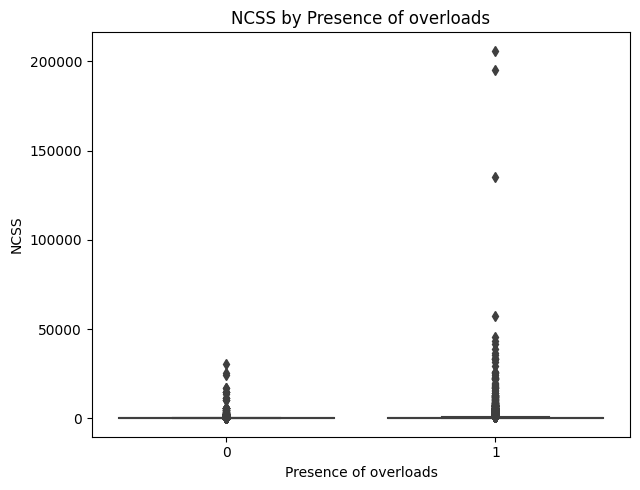

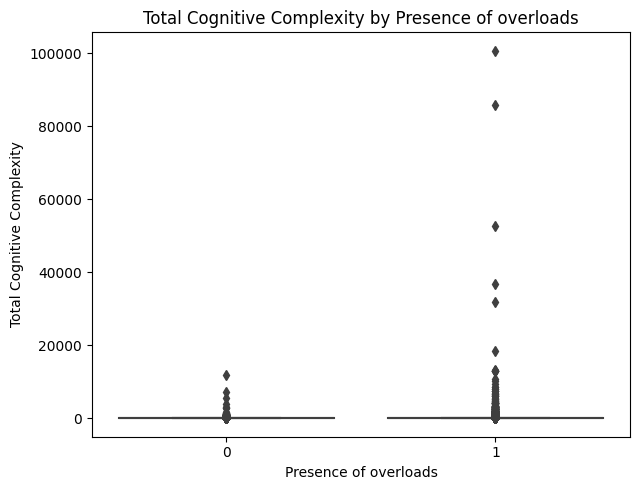

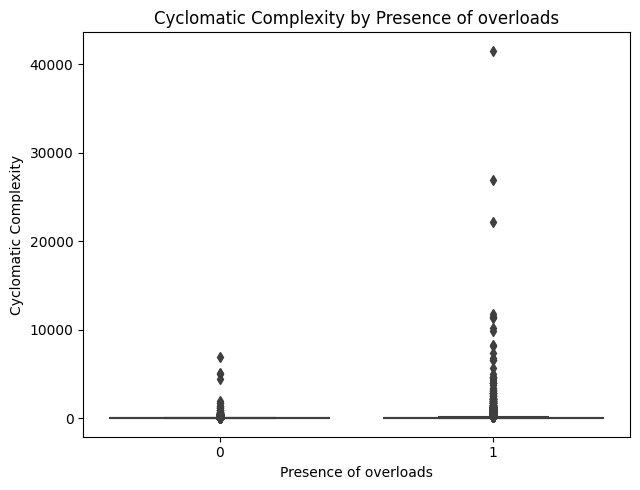

In [141]:
correlation_total_complexity, _ = pointbiserialr(df['Presence of overloads'], df['Total Cognitive Complexity'])
correlation_cyclomatic_complexity, _ = pointbiserialr(df['Presence of overloads'], df['Cyclomatic Complexity'])

print(f"Point-Biserial Correlation Coefficient (Presence of overloads & Total Cognitive Complexity): {correlation_total_complexity}")
print(f"Point-Biserial Correlation Coefficient (Presence of overloads & Cyclomatic Complexity): {correlation_cyclomatic_complexity}")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
# Box plot for NCSS
sns.boxplot(x='Presence of overloads', y='NCSS', data=df, ax=axes)
axes.set_title('NCSS by Presence of overloads')
plt.tight_layout()
fig.savefig("boxplots_1.png")

# Box plot for Total Cognitive Complexity
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
sns.boxplot(x='Presence of overloads', y='Total Cognitive Complexity', data=df, ax=axes)
axes.set_title('Total Cognitive Complexity by Presence of overloads')
plt.tight_layout()
fig.savefig("boxplots_2.png")

# Box plot for Cyclomatic Complexity
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
sns.boxplot(x='Presence of overloads', y='Cyclomatic Complexity', data=df, ax=axes)
axes.set_title('Cyclomatic Complexity by Presence of overloads')
plt.tight_layout()
fig.savefig("boxplots_3.png")

plt.tight_layout()
plt.show()

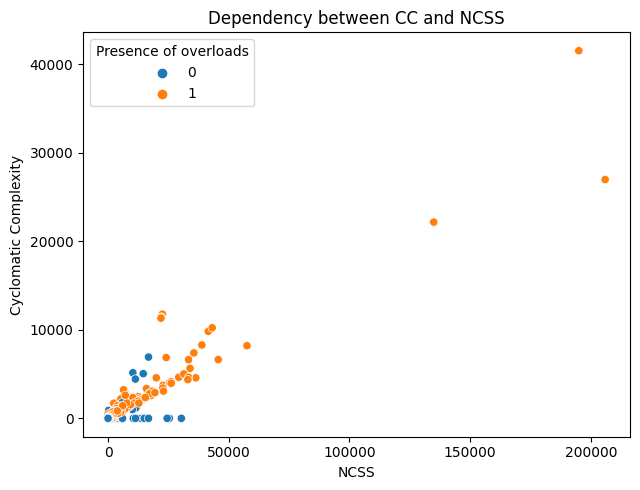

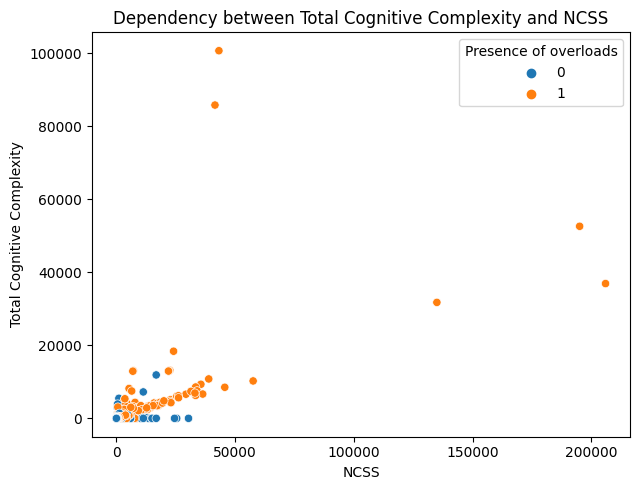

In [142]:
# Visualize dependency between CC and NCSS
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
sns.scatterplot(x='NCSS', y='Cyclomatic Complexity', hue='Presence of overloads', data=df, ax=axes)
axes.set_title('Dependency between CC and NCSS')
plt.tight_layout()
fig.savefig("scatter_full_1.png")

# Visualize dependency between Total Cognitive Complexity and NCSS
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
sns.scatterplot(x='NCSS', y='Total Cognitive Complexity', hue='Presence of overloads', data=df, ax=axes)
axes.set_title('Dependency between Total Cognitive Complexity and NCSS')
plt.tight_layout()
fig.savefig("scatter_full_2.png")

plt.tight_layout()
plt.show()

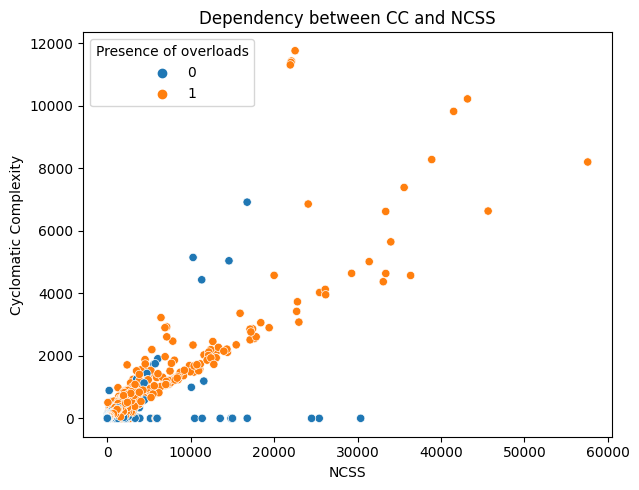

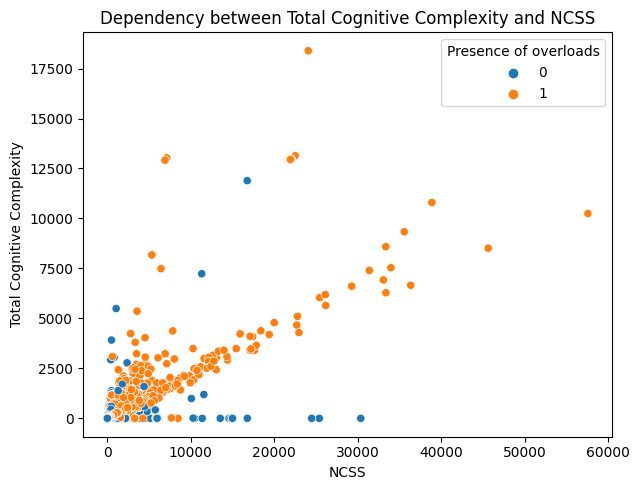

In [143]:
# Visualize dependency between CC and NCSS
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
df_cc = df[(df['NCSS'] < 75000) & (df['Cyclomatic Complexity'] < 15000)]
sns.scatterplot(x='NCSS', y='Cyclomatic Complexity', hue='Presence of overloads', data=df_cc, ax=axes)
axes.set_title('Dependency between CC and NCSS')
plt.tight_layout()
fig.savefig("scatter_small_1.png")

# Visualize dependency between Total Cognitive Complexity and NCSS
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
df_tcc = df[(df['NCSS'] < 75000) & (df['Total Cognitive Complexity'] < 25000)]
sns.scatterplot(x='NCSS', y='Total Cognitive Complexity', hue='Presence of overloads', data=df_tcc, ax=axes)
axes.set_title('Dependency between Total Cognitive Complexity and NCSS')
plt.tight_layout()
fig.savefig("scatter_small_2.png")

plt.tight_layout()
plt.show()

In [144]:
df.groupby('Presence of overloads')['NCSS'].median()

Presence of overloads
0     17.0
1    109.0
Name: NCSS, dtype: float64